In [1]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading dataset
df = pd.read_csv("preproc.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1337 non-null   int64  
 1   age         1337 non-null   int64  
 2   sex         1337 non-null   object 
 3   bmi         1337 non-null   float64
 4   children    1337 non-null   int64  
 5   smoker      1337 non-null   object 
 6   region      1337 non-null   object 
 7   charges     1337 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.7+ KB


In [4]:
df = df.drop('Unnamed: 0', axis =1)

In [5]:
#basic description of numerical variables
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Age analysis

In [6]:
#no. of people by ages
df.age.value_counts()

18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

a pretty long list and boring too for a non technical person. No immediate conclusion can be drawn. So let us draw a count plot

In [7]:
def count_plot(variable):
    plt.figure(figsize=(18,6))
    sns.countplot(x=variable, data = df)
    plt.show()
    

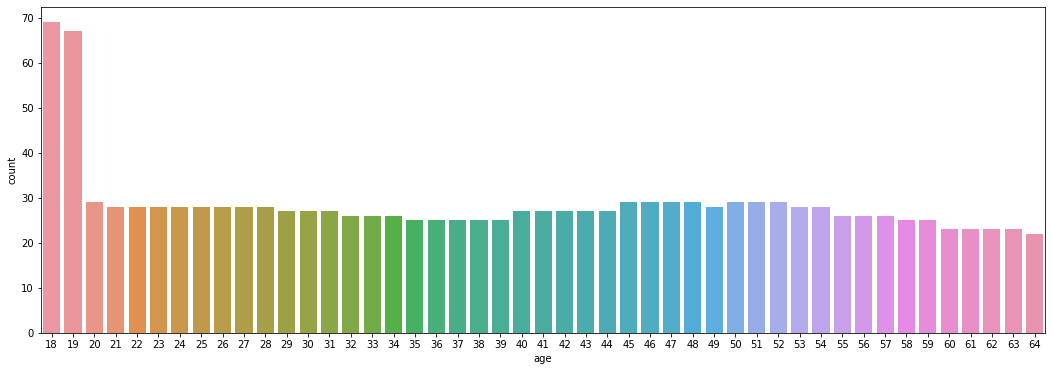

In [8]:
count_plot('age')

max age frequency = 18 and 19
after that distribution is almost uniform

Let us now divide age into categories for a more clearer picture.

In [9]:
conditions = [
    (df['age'] >= 18) & (df['age'] <= 35),
    (df['age'] >= 36) & (df['age'] <= 55),
    (df['age'] > 55)
    ]

age_grp = ['Young Adulthood', 'Middle Age', 'Old Adulthood']

df['age_group'] = np.select(conditions, age_grp)

In [16]:
print('proportions of age group by %')
proportions = (df.groupby('age_group').age.count()/(df.age.count()))*100
proportions

proportions of age group by %


age_group
Middle Age         40.987285
Old Adulthood      16.155572
Young Adulthood    42.857143
Name: age, dtype: float64

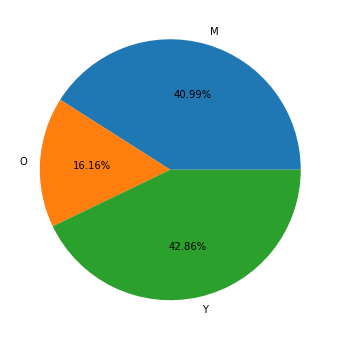

In [17]:
plt.figure(figsize=(6,6))
plt.pie(proportions,labels=['M','O','Y'],autopct='%.2f%%')
plt.show()

We can see that Young adults constitute most in numbers with middle age being slightly less in numbers. Older population is significantly more.

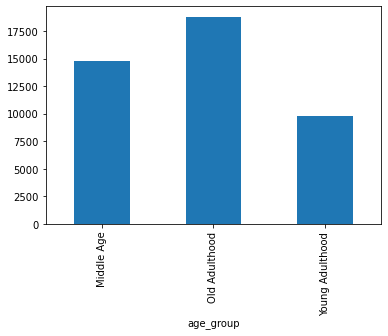

In [74]:
charges_mean = df.groupby('age_group').charges.mean().plot(kind = "bar")

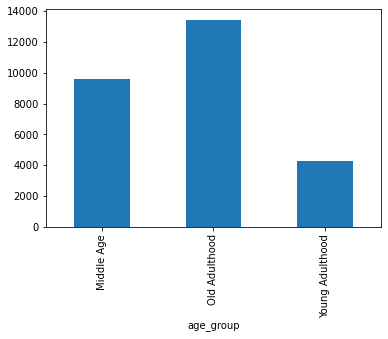

In [28]:
charges_median = df.groupby('age_group').charges.median().plot(kind = "bar")

Older population is definitely charged more while younger population is charged less and this was expected.

In [75]:
#lets check bmi by age and see if there is any pattern
print('age group by bmi')
bmi_mean = (df.groupby('age_group').bmi.mean())
bmi_median = (df.groupby('age_group').bmi.median())
print('Mean BMI')
print(bmi_mean)
print('Median BMI')
print(bmi_median)

age group by bmi
Mean BMI
age_group
Middle Age         30.819088
Old Adulthood      31.739329
Young Adulthood    30.109040
Name: bmi, dtype: float64
Median BMI
age_group
Middle Age         30.495
Old Adulthood      31.825
Young Adulthood    29.920
Name: bmi, dtype: float64


No pattern is seen here just by a simple look. Also Mean and Median BMI is falling in the range of 30 for all groups indicating a problem of obesity in genral population. We will be breaking BMI into health categories for a more clearer view and that starts our BMI analysis.

In [29]:
conditions = [
    (df['bmi'] < 18),
    (df['bmi'] >= 18) & (df['bmi'] <= 24),
    (df['bmi'] > 24) & (df['bmi'] <= 30),
    (df['bmi'] > 30)
    ]

grp = ['Underweight', 'Fit', 'Overweight', 'Obese']

df['health_cat'] = np.select(conditions, grp)

In [33]:
df.groupby(['age_group']).health_cat.value_counts()

age_group        health_cat 
Middle Age       Obese          291
                 Overweight     190
                 Fit             65
                 Underweight      2
Old Adulthood    Obese          130
                 Overweight      65
                 Fit             21
Young Adulthood  Obese          283
                 Overweight     190
                 Fit             87
                 Underweight     13
Name: health_cat, dtype: int64

In all the age categories the proprtions of obese and overweight persons is very large.
Now, we will check the distribution of bmi graphically and then check about the dependence of bmi on age and cost of insurance.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

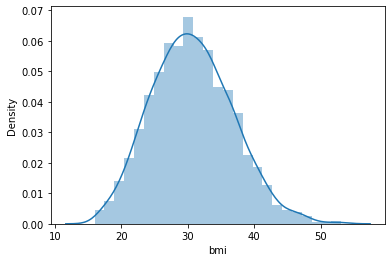

In [40]:
sns.distplot(df.bmi)

That is a very nice symetric graph. Most bmi values are in range 28-32 giving overall representation of health status as between overweight and obese.

In [41]:
df['age'].corr(df['bmi'])


0.10934361041896885

In [43]:
df['charges'].corr(df['bmi'])

0.19840083122624935

We see that there is a very little correlation. A significantly larger correlation between charges and bmi was expected. Low correlation between age and bmi indicates a very serious issue of obesity in a younger population. 

Let us now start smoking analysis

In [44]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

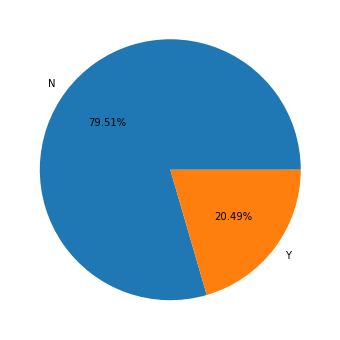

In [46]:
plt.figure(figsize=(6,6))
plt.pie(df['smoker'].value_counts(),labels=['N','Y'],autopct='%.2f%%')
plt.show()


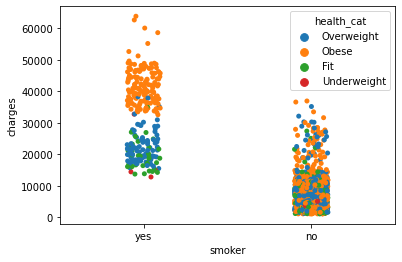

In [55]:
sns.stripplot(x="smoker", y="charges", hue = 'health_cat', data = df)
  
plt.show()

<AxesSubplot:xlabel='smoker', ylabel='charges'>

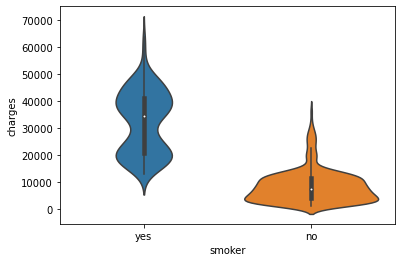

In [52]:
sns.violinplot(x ="smoker",
             y ="charges",
             data = df)

Based on the above two plots, it can be inferred that smoking and charges do have a higher correlation. One curious detail that can be seen from the strip plot is that charges will me highest for the smoker and obese person.
This lefts us with a question whether smoking and bmi are related in some way. Let us find out.

<AxesSubplot:xlabel='smoker', ylabel='bmi'>

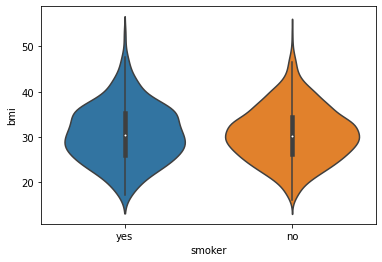

In [58]:
sns.violinplot(x ="smoker",
             y ="bmi",
             data = df)

Well... No. BMI and smoking status are not correlated and that is again a surprising observation.

In [59]:
df.groupby('smoker').charges.mean()

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

In [60]:
df.groupby('smoker').charges.median()

smoker
no      7345.72660
yes    34456.34845
Name: charges, dtype: float64

smokers are charged almost 4 times more than non-smokers on average.

Gender Analysis

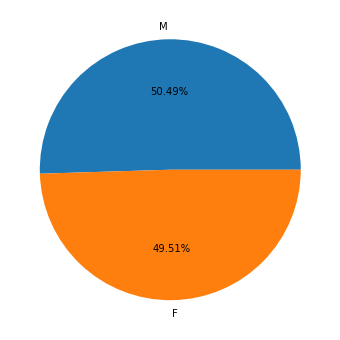

In [61]:
plt.figure(figsize=(6,6))
plt.pie(df['sex'].value_counts(),labels=['M','F'],autopct='%.2f%%')
plt.show()

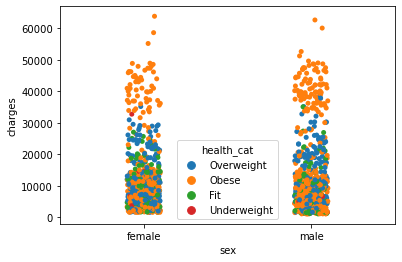

In [62]:
sns.stripplot(x="sex", y="charges", hue = 'health_cat', data = df)
  
plt.show()

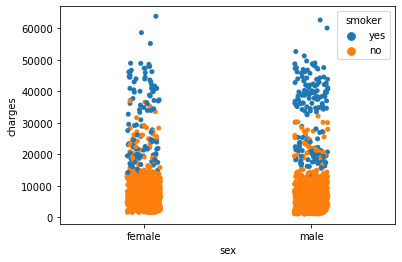

In [64]:
sns.stripplot(x="sex", y="charges", hue = 'smoker', data = df)
  
plt.show()

<AxesSubplot:xlabel='sex', ylabel='charges'>

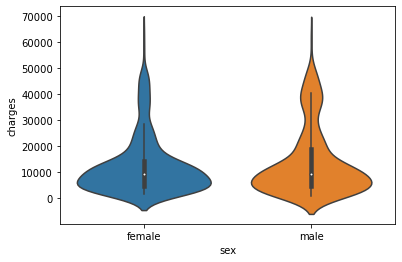

In [63]:
sns.violinplot(x ="sex",
             y ="charges",
             data = df)

1. Male and female represents almost equally in the dataset. There is a very high chance if someone is charged very high then he/she is an obese person and smokes.
2. In terms of charges, there is a larger proprtion of female in the 0-10000 cost bracket as compared to men. Let us now check the mean and median values of charges by sex.

In [65]:
df.groupby('sex').charges.mean()

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

In [66]:
df.groupby('sex').charges.median()

sex
female    9412.9625
male      9377.9047
Name: charges, dtype: float64

There is a very minimal difference of charges when sex is taken into the picture. 

Family analysis

In [67]:
df['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

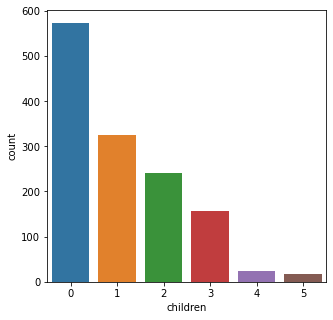

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(x='children', data = df)
plt.show()

We see that majority of people have no children indicating that they may be unmarried. A separate of column of marital status would have given some more insights. Also number of families having 4 or 5 children are also very less in number.

In [69]:
df.groupby('children').charges.mean()

children
0    12384.695344
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [70]:
df.groupby('children').charges.median()

children
0     9863.47180
1     8483.87015
2     9264.97915
3    10600.54830
4    11033.66170
5     8589.56505
Name: charges, dtype: float64

We see that there is no significant pattern being seen in the charges and no. of children. People having 2 or 3 children are charged most on average. While considering median, story changes a little as People having 3 or 4 children are charged most. Also people having no children or 5 children are charged significantly less considering median depicting a low correlation.

Let us now find out correlation.

In [71]:
df['children'].corr(df['charges'])


0.06738935083963245

As expected... a correlation of just 6%.

Region Analysis

In [72]:
df.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

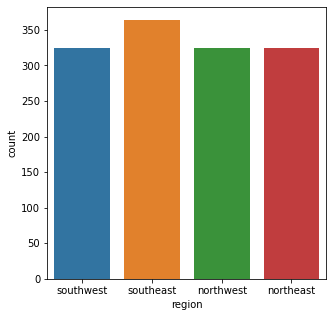

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data = df)
plt.show()

<AxesSubplot:xlabel='region'>

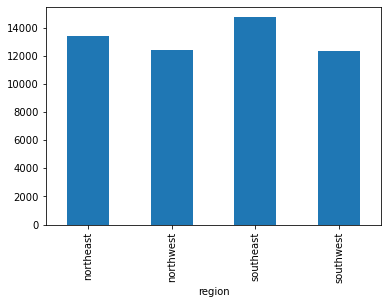

In [75]:
df.groupby('region').charges.mean().plot(kind = "bar")

<AxesSubplot:xlabel='region'>

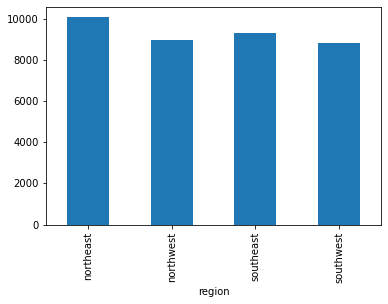

In [76]:
df.groupby('region').charges.median().plot(kind = "bar")

In [77]:
df.groupby('region').charges.mean()

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [78]:
df.groupby('region').charges.median()

region
northeast    10057.652025
northwest     8976.977250
southeast     9294.131950
southwest     8798.593000
Name: charges, dtype: float64

There is no significant pattern region-wise too.

Let us now see the final correlation.

In [83]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<AxesSubplot:>

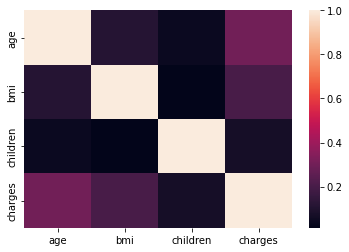

In [82]:
sns.heatmap(df.corr())

This ends our EDA. 
A interactive tableau dashboard will be made to gain some more insights.
Now, we will move to Model training.

In [84]:
df.to_csv('preproc_viz.csv')